In [2]:
import gsw 

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
%matplotlib inline
from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

# import my modules
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt 



In [80]:

CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
phiHyd = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/phiHydGlob.nc'
pout = Dataset(phiHyd)
CGridOut = Dataset(CGrid)

# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 3 # number of tracers in run

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
MaskC = rout.getMask(CGrid, 'HFacC')
rA = rout.getField(CGrid, 'rA')

Tp = pout.variables['T']
bathy = rout.getField(CGrid, 'Depth')



In [81]:
# STATIONS
ys = [262,220,262,227,100,245,245,262,220]
xs = [60,60,180,180,180,160,200,300,300]
stations = ['UpSh','UpSl','CH','CM','CO','UpC','DnC','DnSh','DnSl']

#All experiments in CNT and 3D including no canyon one (run07)
expList = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run10',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07']
           
expNames = ['CNTDIFF_run02',
           'CNTDIFF_run03',
           'CNTDIFF_run04',
           'CNTDIFF_run09',
           'CNTDIFF_run10',
           'CNTDIFF_run11',
           'CNTDIFF_run12',
           'CNTDIFF_run14',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
           


In [82]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')


In [83]:
def plotN(ax,z,N,N0,lab,title):
    ax.plot(N,z,label=lab)
    ax.plot(N0,z,'--',color='grey')
    ax.set_title(title)
    ax.set_xlabel('$N^2$ ($s^{-2}$)')
    ax.set_ylabel('depth (m)')



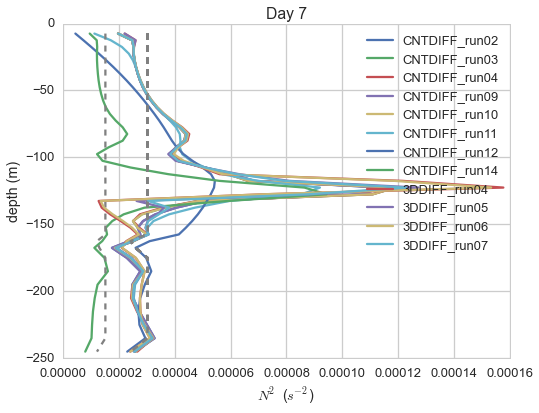

In [84]:
fig1= plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)
sns.set_palette('Set1',8)
for runs in expNames:
    key = ['N2_tt14']
    key0 = ['N2_tt00']
   
    sname = 'DnC'
    filename1 = ('results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))
    
    df = pd.read_csv(filename1)
    col = df[key]
    col0 = df[key0]
    plotN(ax1,rc[1:-1],col,col0,runs,'Day 7')


ax1.legend(loc=0)   

plt.show()
   
        
        
        


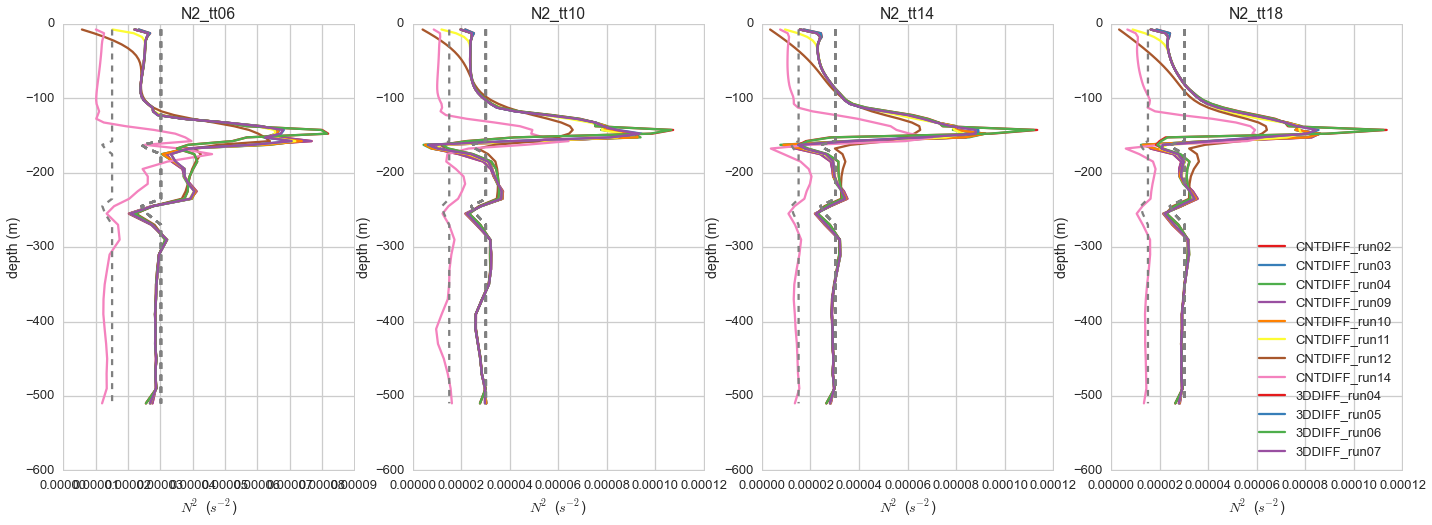

In [85]:
fig1= plt.figure(figsize=(24,8))

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

axs = [ax1,ax2,ax3,ax4]

sns.set_palette('Set1',8)

keys = ['N2_tt06','N2_tt10','N2_tt14','N2_tt18']
key0 = ['N2_tt00']

for runs in expNames:
    
    for key,a in zip(keys,axs):
    
        sname = 'CM'
        filename1 = ('results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))
    
        df = pd.read_csv(filename1)
        col = df[key]
        col0 = df[key0]
        plotN(a,rc[1:-1],col,col0,runs,key)


ax4.legend(loc=0)   
plt.show()
   
        

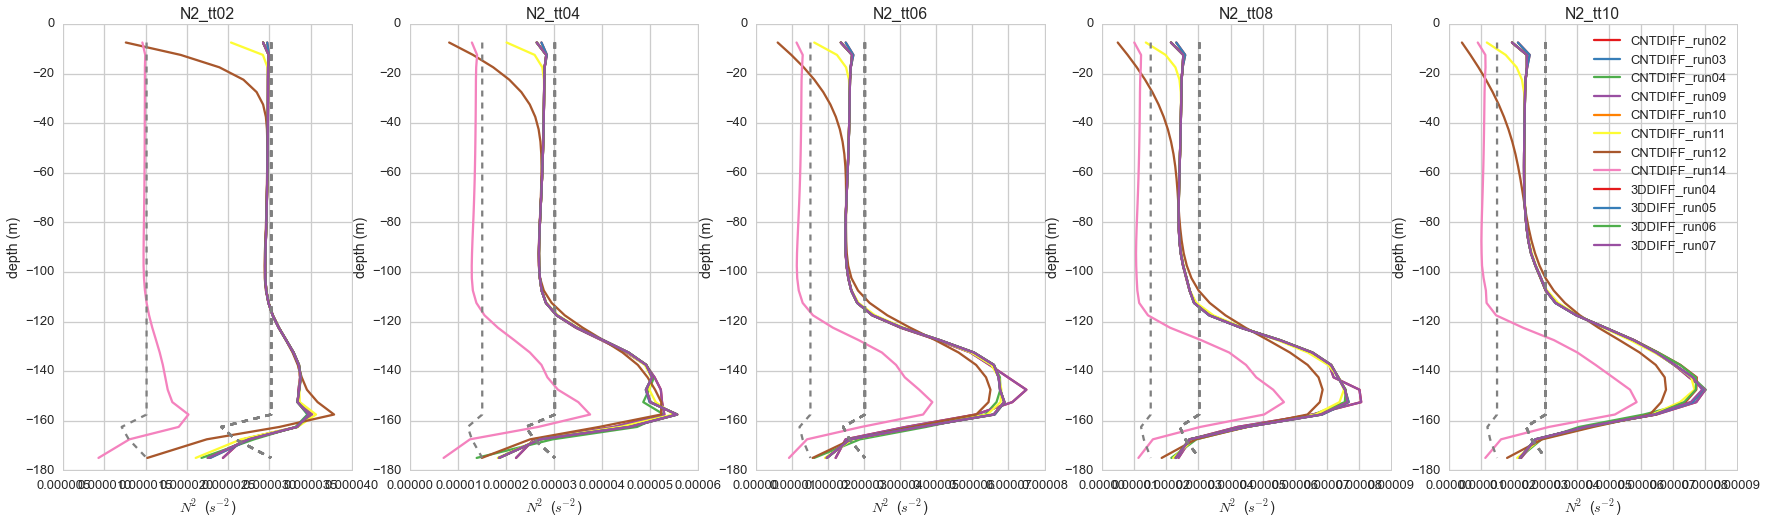

In [86]:
fig1= plt.figure(figsize=(30,8))

ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

axs = [ax1,ax2,ax3,ax4,ax5]

sns.set_palette('Set1',8)

keys = ['N2_tt02','N2_tt04','N2_tt06','N2_tt08','N2_tt10']
key0 = ['N2_tt00']

for runs in expNames:
    
    for key,a in zip(keys,axs):
    
        sname = 'UpSl'
        filename1 = ('results/metricsDataFrames/N2_%s_%s_timeDepPhase.csv' % (runs,sname))
    
        df = pd.read_csv(filename1)
        col = df[key]
        col0 = df[key0]
        plotN(a,rc[1:-1],col,col0,runs,key)


ax5.legend(loc=0)   
plt.show()
   
        

In [87]:
# calculate average N2 between canyon head depth and shelf break during the middle of the advective phase (t=7days) 
# at dmand save as pandas dataframe. For all runs
expNames2 = ['CNTDIFF_run02',
           'CNTDIFF_run03',
           'CNTDIFF_run04',
           'CNTDIFF_run09',
           'CNTDIFF_run10',
           'CNTDIFF_run11',
           'CNTDIFF_run12',
           'CNTDIFF_run14',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
           

Navg = np.zeros(12) # 12 experiments with statification
kk = 0

for runs in expNames2:
    
    key = ['N2_tt10']
    key0 = ['N2_tt00']
    
    sname = 'CM'
    filename1 = ('results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))
    print(filename1)
    df = pd.read_csv(filename1)
    col = df[key]  
    col0 = df[key0]
    print(col0)
    Navg[kk] = np.max(np.sqrt(col))
    kk=kk+1
        
raw_data = {'expNames':expNames2,'N': Navg}
df2 = pd.DataFrame(raw_data, columns = ['expNames','N'])
filename2 = ('results/metricsDataFrames/N_t10max_%s.csv' %sname)
df2.to_csv(filename2)
        
    

results/metricsDataFrames/N2_CNTDIFF_run02_CM.csv
    N2_tt00
0   0.00003
1   0.00003
2   0.00003
3   0.00003
4   0.00003
5   0.00003
6   0.00003
7   0.00003
8   0.00003
9   0.00003
10  0.00003
11  0.00003
12  0.00003
13  0.00003
14  0.00003
15  0.00003
16  0.00003
17  0.00003
18  0.00003
19  0.00003
20  0.00003
21  0.00003
22  0.00003
23  0.00003
24  0.00003
25  0.00003
26  0.00003
27  0.00003
28  0.00003
29  0.00003
..      ...
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83      NaN
84      NaN
85      NaN
86      NaN
87      NaN

[88 rows x 1 columns]
results/metricsDataFrames/N2_CNTDIFF_run03_CM.csv
    N2_tt00
0   0.00003
1   0.00003
2   0.00003
3   0.00003
4   0.00003
5   0.00003
6   0.00003
7   0.00003
8   0.00003
9   0.00003
1

In [10]:
col0

,N2_tt00
0,0.000013
1,0.000013
2,0.000013
3,0.000013
4,0.000013
5,0.000013
6,0.000013
7,0.000013
8,0.000013
9,0.000013


In [11]:
np.sqrt(0.000006)

0.0024494897427831783

In [17]:
alpha = 2.0E-4 # 1/degC
beta = 7.4E-4
Ttop = 12.0
Tbot = 10.0
Stop = 32.0
Sbot = 33.0
rhoref = 999.79998779

N = np.sqrt((-9.81)* ((-alpha*(Ttop-Tbot)+beta*(Stop-Sbot))/(1200.0)) )
N

0.0030527856131736474

In [6]:
print(Ttop ,Tbot ,Stop ,Sbot )

(20, 3, 31.0, 34.0)
